In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib
import os

%matplotlib inline

In [2]:
#Loading the files to check how the objects selected changes with different conditions

Path_loc = '/disks/strw3/jvilla/Major_JorgeVilla/RNAAS/'

ScoCen_Parallax = Table.read(Path_loc+'/Data/ScoCen_Parallax.csv', format = 'ascii', data_start = 0, fast_reader = True)

#Checking thenumber of stars retrieved per field

print('The number of stars if parallax cut is included is: %i'%len(ScoCen_Parallax["source_id"]))

The number of stars if parallax cut is included is: 81986


In [3]:
#Using the unight weight error criterion proposed by L. Lindegren et al., 2018

Mag      = np.subtract(ScoCen_Parallax['g_mag_abs'], 19.5)
Sample   = ScoCen_Parallax[np.where(ScoCen_Parallax['vis_period'] >= 6)]
U        = np.sqrt(Sample['unit_weight'])

Cleaned_Sample   = Sample[np.where( U < 1.44*np.maximum(1.0, np.exp(-0.2*Mag)))]

print('Original - More than 6 visibility')
print(len(Sample))

print('More than 6 visibility + Chi-square')
print(len(Cleaned_Sample)) 

Original - More than 6 visibility
81986
More than 6 visibility + Chi-square
79906


In [4]:
#Plygon Path is loaded 

Cleaned_Sample_Path = Table.read(Path_loc+'/Data/Path_Selection.csv', format = 'ascii', data_start = 0, fast_reader = True)
Cleaned_Sample_Path = np.stack(zip(Cleaned_Sample_Path['col1'], Cleaned_Sample_Path['col2']))

In [5]:
#Only pre-main sequence stars selection

'''Only pre-main sequence stars are selected using the Path defined above.
The coordinates in Ra and Dec, and also in l and b are stored to produce
a figure showing the distribution of these stars on the sky plane.'''

x_DR2 = np.array(Cleaned_Sample["bp_rp"])
y_DR2 = np.array(Cleaned_Sample["g_mag_abs"])

Cleaned_Sample_Codes = []
for i in range(len(Cleaned_Sample_Path[:,0])):
    if i == 0:
        Cleaned_Sample_Codes.append(1)
    if i != 0 and i != len(Cleaned_Sample_Path[:,0]) - 1:
        Cleaned_Sample_Codes.append(2)
    if i == len(Cleaned_Sample_Path[:,0]) - 1:
        Cleaned_Sample_Codes.append(79)

path_DR2         = Path(Cleaned_Sample_Path, Cleaned_Sample_Codes)

Points_DR2       = np.column_stack((x_DR2,y_DR2))
Sample_DR2 = []
RA_DR2     = []
DEC_DR2    = []
l_DR2      = []
b_DR2      = []
for i in range(len(Points_DR2)):
    if path_DR2.contains_point(Points_DR2[i].tolist()) == True:
        Sample_DR2.append(Points_DR2[i])
        RA_DR2.append(Cleaned_Sample["ra"][i])
        DEC_DR2.append(Cleaned_Sample["dec"][i])
        l_DR2.append(Cleaned_Sample["l"][i])
        b_DR2.append(Cleaned_Sample["b"][i]) 
Sample_DR2 = np.array(Sample_DR2)

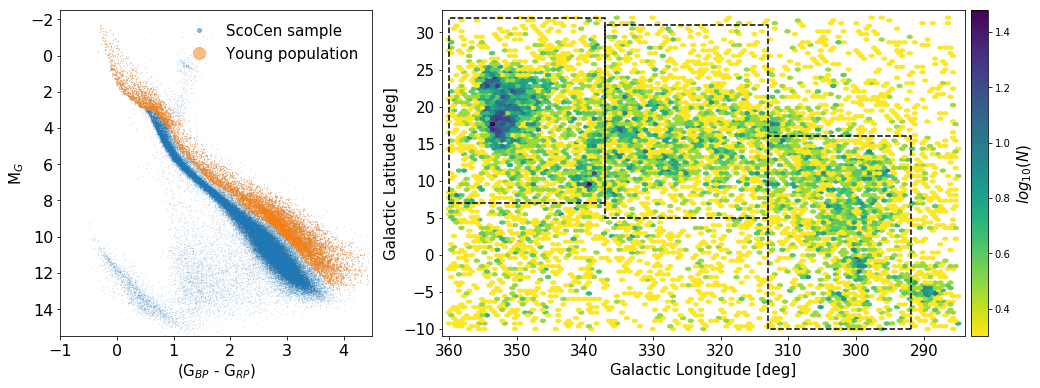

In [26]:
'''Combined figures'''

LCC = patches.Rectangle((292, -10), 21, 26,linewidth = 1.5, linestyle = '--', edgecolor = 'k', facecolor = 'none')
UCL = patches.Rectangle((313,5), 24, 26, linewidth = 1.5,  linestyle ='--', edgecolor = 'k', facecolor = 'none')
US  = patches.Rectangle((337,7), 23, 25, linewidth = 1.5, linestyle = '--', edgecolor = 'k', facecolor = 'none')

fig, ((axA, axB)) = plt.subplots(figsize = (18,6), nrows = 1, ncols = 2, sharey = False,\
                                 gridspec_kw = {'width_ratios':[1, 2]})

axA.plot(Cleaned_Sample['bp_rp'], Cleaned_Sample['g_mag_abs'], 'o', markersize = 0.1, alpha = 0.5)
axA.plot(Sample_DR2[:,0], Sample_DR2[:,1], 'o', markersize = 0.3, alpha = 0.5)
axA.legend(['ScoCen sample', 'Young population'], \
           frameon = False, prop = {'size': 15}, markerscale = 40, loc = 'upper right')
axA.set_ylim(15.5,-2.5)
axA.set_xlim(-1, 4.5)
axA.set_ylabel(r"M$_{G}$", size = 15)
axA.set_xlabel(r"(G$_{BP}$ - G$_{RP}$)", size = 15)
axA.tick_params(axis = 'both', which = 'major', labelsize = 16)

B = axB.hexbin(l_DR2, b_DR2, gridsize = 100, bins = 'log', mincnt = 1, cmap = 'viridis_r')
axB.add_patch(US)
axB.add_patch(UCL)
axB.add_patch(LCC)
axB.set_xlim(361, 284)
axB.set_ylim(-11, 33)
axB.set_xlabel("Galactic Longitude [deg]", size = 15)
axB.set_ylabel("Galactic Latitude [deg]", size = 15)
axB.tick_params(axis = 'both', which = 'major', labelsize = 15)
cb = fig.colorbar(B, ax = axB, pad = 0.01)
cb.set_label(r'$log_{10} (N)$', size = 15)

fig.subplots_adjust(wspace = 0.15)

plt.savefig(Path_loc+"Figures/ScoCen_Coordinates_2.png", dpi = 300, bbox_inches = 'tight')

In [21]:
'''Ra and Dec coordinates are saved for the selected pre-main sequence sample'''

print('There are %i pre-main sequence stars in the smaple'%len(RA_DR2))

RA = np.append(RA_DR2, RA_DR2); DEC = np.append(DEC_DR2, DEC_DR2)

np.savetxt(Path_loc+'Data/Coordinates_DR2_PreMainSequence.csv', np.c_[RA, DEC], fmt = ['%.15f','%.15f'], delimiter = ',')


There are 11129 pre-main sequence stars in the smaple
